In [9]:
import os
import torch
import math
import torchvision
import numpy as np
# from torch.utils.data import Subset
from torch.utils.data.dataset import random_split

In [37]:
!pip install tqdm

     |████████████████████████████████| 61kB 1.5MB/s eta 0:00:011


In [10]:
loc_color = "../PlantVillage-Dataset/raw/color/"
loc_grayscale = "../PlantVillage-Dataset/raw/grayscale/"
loc_segmented = "../PlantVillage-Dataset/raw/segmented/"

In [60]:
from collections import defaultdict
import shutil
import os
import tqdm
def split_image_folder(path, output, train=0.6, val=0.2):
    classes = [x for x in os.listdir(path) if os.path.isdir(os.path.join(path, x))]
    labels = []
    examples = []
    for c in classes:
        for img in os.listdir(os.path.join(path, c)):
            labels.append(c)
            examples.append(os.path.join(path, c, img))
    
    n_data = len(labels)
    n_train = int(n_data * train) # 32588 #60 %
    n_left = n_data - n_train
    n_val = int(n_left * val / (1 - train)) #10860 #20 %
    n_test = n_left - n_val
    
    p = np.random.permutation(n_data)
    labels = np.array(labels)[p]
    examples = np.array(examples)[p]
    
    train_label = labels[:n_train]
    val_label = labels[n_train:n_train+n_val]
    test_label = labels[n_train+n_val:]
    
    train_ex = examples[:n_train]
    val_ex = examples[n_train:n_train+n_val]
    test_ex = examples[n_train+n_val:]
    
    for split, label, example in zip(['train', 'val', 'test'], [train_label, val_label, test_label], [train_ex, val_ex, test_ex]):
        split_root = os.path.join(output, split)
        os.makedirs(split_root, exist_ok=True)
        for l, e in tqdm.tqdm(list(zip(label, example))):
            if not os.path.isfile(e):
                continue
            _, filename = os.path.split(e)
            if not os.path.exists(os.path.join(split_root, l)):
                os.mkdir(os.path.join(split_root, l))
            shutil.copyfile(e, os.path.join(split_root, l, filename))
        

In [61]:
split_image_folder(loc_color, './pvd-color-split')

100%|██████████| 10862/10862 [00:01<00:00, 10639.17it/s]


In [60]:
def export_image_folder(path, image_folder):
    for image, label in image_folder:
        print(image_folder.dataset.classes[label])
        image.save()

In [73]:
# data split
data = torchvision.datasets.ImageFolder(root=loc_color)

train_perc = 0.6
val_perc = 0.2
test_perc = 0.2
n_data = len(data)

n_train = int(n_data * train_perc) # 32588 #60 %
n_left = n_data - n_train
n_val = int(n_left * val_perc / (1 - train_perc)) #10860 #20 %
n_test = n_left - n_val
# n_test = math.ceil(n_data * test_perc) #10860 #20 %

lengths = [n_train, n_val, n_test]

train_dataset, val_dataset, test_dataset = random_split(data, lengths)

Orange___Haunglongbing_(Citrus_greening)


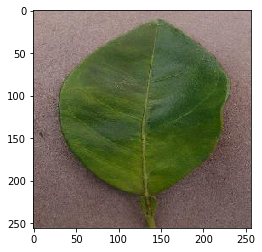

In [74]:
export_image_folder('./pv-train', train_dataset)

In [39]:
train_dataset.classes

AttributeError: 'Subset' object has no attribute 'classes'

In [25]:
n_data * train_perc

32584.8

In [26]:
n_train

32584

In [27]:
n_val

10862

In [28]:
n_train

32584

In [29]:
n_val + n_val + n_train 

54308

In [30]:
n_test

10862

In [ ]:
random_split

In [79]:
n_val

0

In [76]:
# load train
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=1,
    num_workers=0,
    shuffle=True
)

for batch_idx, (data, target) in enumerate(train_loader):
    print(batch_idx, data, target)
    break

0 tensor([[[[0.5647, 0.4000, 0.3882,  ..., 0.4902, 0.4118, 0.4275],
          [0.4706, 0.4784, 0.4980,  ..., 0.4118, 0.4196, 0.4941],
          [0.3804, 0.4980, 0.5176,  ..., 0.4980, 0.4667, 0.4549],
          ...,
          [0.6588, 0.6627, 0.6706,  ..., 0.6196, 0.6471, 0.6706],
          [0.6667, 0.6706, 0.6745,  ..., 0.6275, 0.6353, 0.6392],
          [0.6667, 0.6667, 0.6706,  ..., 0.6275, 0.6235, 0.6078]],

         [[0.5412, 0.3765, 0.3647,  ..., 0.4510, 0.3725, 0.3882],
          [0.4471, 0.4549, 0.4745,  ..., 0.3725, 0.3804, 0.4549],
          [0.3569, 0.4745, 0.4941,  ..., 0.4588, 0.4275, 0.4157],
          ...,
          [0.6353, 0.6392, 0.6471,  ..., 0.5961, 0.6235, 0.6471],
          [0.6431, 0.6471, 0.6510,  ..., 0.6039, 0.6118, 0.6157],
          [0.6431, 0.6431, 0.6471,  ..., 0.6039, 0.6000, 0.5843]],

         [[0.5490, 0.3843, 0.3725,  ..., 0.4549, 0.3765, 0.3922],
          [0.4549, 0.4627, 0.4824,  ..., 0.3765, 0.3843, 0.4588],
          [0.3647, 0.4824, 0.5020,  ...,